### Seeding for reproducibility

In [1]:
#  Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
type(test_images)

numpy.ndarray

In [7]:
type(test_labels)

numpy.ndarray

In [8]:
len(train_labels)

60000

In [9]:
len(train_images)

60000

In [10]:
train_images.shape

(60000, 28, 28)

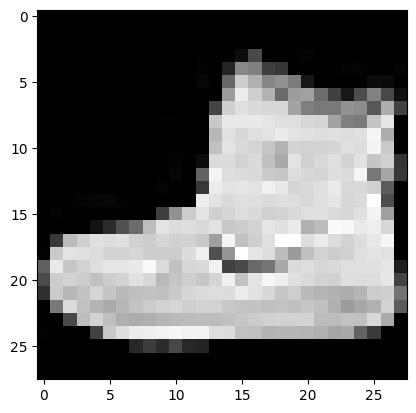

In [11]:
# Display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [12]:
print(train_labels[0])

9


In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

##### class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [17]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [18]:
train_images.shape

(60000, 28, 28, 1)

In [19]:
#Convolutional Neural network

# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



In [21]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4907 - accuracy: 0.8210 - val_loss: 0.3626 - val_accuracy: 0.8695
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3189 - accuracy: 0.8832 - val_loss: 0.3146 - val_accuracy: 0.8878
Epoch 3/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2716 - accuracy: 0.8998 - val_loss: 0.2879 - val_accuracy: 0.8974
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2415 - accuracy: 0.9100 - val_loss: 0.2782 - val_accuracy: 0.8973
Epoch 5/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2177 - accuracy: 0.9190 - val_loss: 0.2720 - val_accuracy: 0.9016


In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.2720 - accuracy: 0.9016 - 3s/epoch - 8ms/step

Test accuracy: 0.9016000032424927


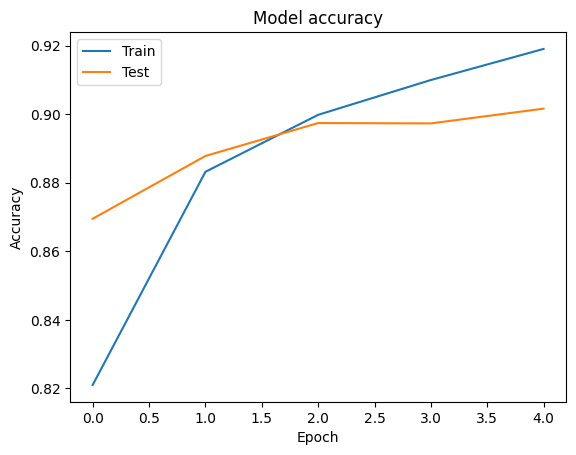

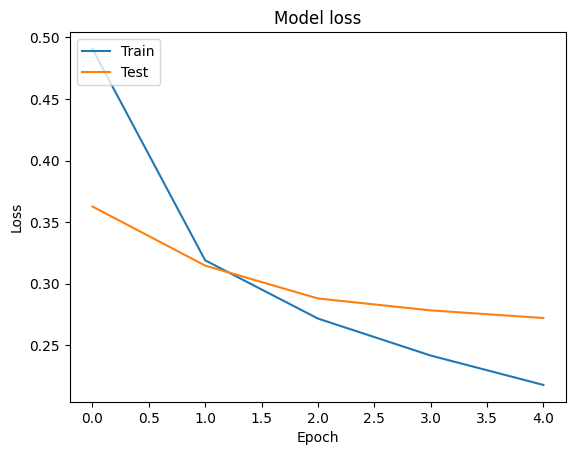

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
model.save('trained_fashion_mnist_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
